In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier


In [2]:
data = pd.read_csv("D:/AP/Data/CrossSell/Ins_train.csv")

In [3]:
replaceStruct = {
                "Vehicle_Age":     {"< 1 Year": 1, "1-2 Year": 2 ,"> 2 Years": 3},
                "Gender":     {"Female": 0, "Male": 1 },
                "Vehicle_Damage":     {"No": 0, "Yes": 1 } 
                    }

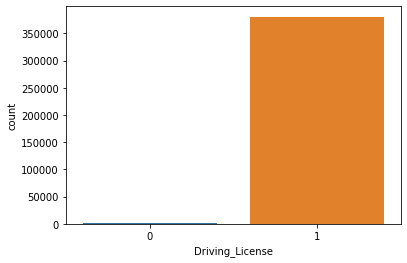

In [6]:
sns.countplot(data.Driving_License)

In [4]:
data = data.replace(replaceStruct)

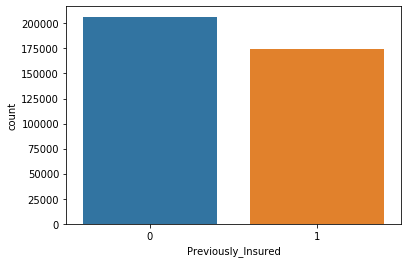

In [20]:
sns.countplot(data.Previously_Insured)

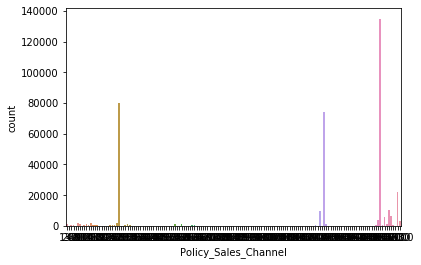

In [9]:
sns.countplot(data.Policy_Sales_Channel)

In [10]:
len(data['Policy_Sales_Channel'].value_counts())

155

In [11]:
data['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

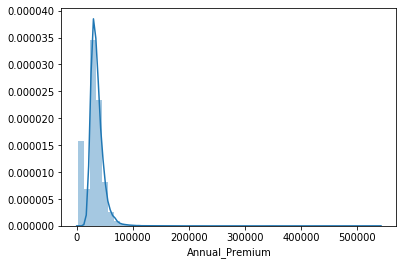

In [8]:
sns.distplot(data.Annual_Premium)

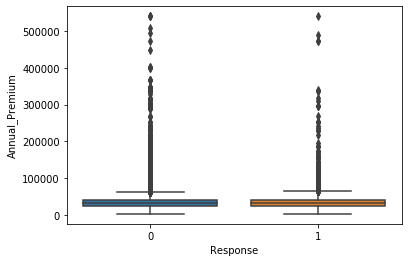

In [18]:
sns.boxplot(data=data, x = "Response",  y = "Annual_Premium")

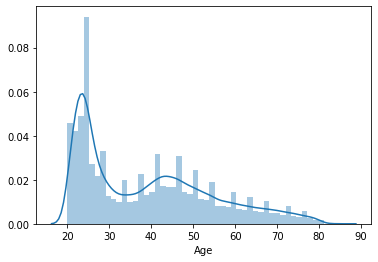

In [12]:
sns.distplot(data.Age)

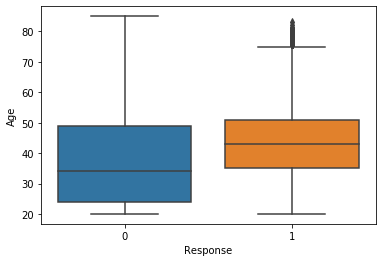

In [13]:
sns.boxplot(data = data, x= "Response", y = "Age")

In [15]:
len(data.Region_Code.value_counts())

53

In [16]:
data.Region_Code.value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [7]:
data["Annual_Premium"] = np.where(data["Annual_Premium"] >100000, 100000.0,data['Annual_Premium'])

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
num_feat = ['Age','Annual_Premium','Vintage' ]

for column in num_feat:
    data[[column]] = sc.fit_transform(data[[column]])

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_feat = ['Region_Code', 'Policy_Sales_Channel' ]
lb = LabelEncoder()
for column in cat_feat:
    data[column] = data[column].astype('str')
    data[column] = lb.fit_transform(data[column])

In [10]:
y = data['Response']
X = data[['Gender', 'Age', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [17]:
ev_set = [[x_train, y_train],[x_test, y_test]]

In [31]:
lg = LGBMClassifier(learning_rate = 0.05, n_estimators=500,n_jobs = -1, max_depth = 13, class_weight="balanced")
lg.fit(x_train, y_train, early_stopping_rounds = 10, eval_set = ev_set, eval_metric = "auc")

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	training's auc: 0.85015	training's binary_logloss: 0.672185	valid_1's auc: 0.84956	valid_1's binary_logloss: 0.672402
Training until validation scores don't improve for 10 rounds
[2]	training's auc: 0.851465	training's binary_logloss: 0.65331	valid_1's auc: 0.850827	valid_1's binary_logloss: 0.654033
[3]	training's auc: 0.851564	training's binary_logloss: 0.636089	valid_1's auc: 0.851067	valid_1's binary_logloss: 0.637524
[4]	training's auc: 0.851701	training's binary_logloss: 0.620498	valid_1's auc: 0.85107	valid_1's binary_logloss: 0.622832
[5]	training's auc: 0.85252	training's binary_logloss: 0.606192	valid_1's auc: 0.851872	valid_1's binary_logloss: 0.609535
[6]	training's auc: 0.852927	training's binary_logloss: 0.593091	valid_1's auc: 0.85227	valid_1's binary_logloss: 0.597557
[7]	training's auc: 0.853201	training's binary_logloss: 0.581098	valid_1's auc: 0.852573	valid_1's 

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=13,
               n_estimators=500)

In [32]:
pred = lg.predict(x_test,num_iteration = 98 )

In [33]:
confusion_matrix(y_test, pred)

array([[44642, 22255],
       [  653,  8672]], dtype=int64)

In [34]:
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(y_test, pred))
print("Precision:",precision_score(y_test, pred))
print("Recall:",recall_score(y_test, pred))
print('F1-Score:',f1_score(y_test, pred))

Accuracy: 0.6994568497284248
Precision: 0.2804022375270799
Recall: 0.9299731903485254
F1-Score: 0.4308854218423929
